In [1]:
#1차원 이산확률분포 -> 동전던지기 앞 뒤면
import numpy as np
import matplotlib.pyplot as plt

x_set = np.array([1,2,3,4,5,6]) # 불균형 주사위 

def f(x): # 사용자 함수 정의
    if x in x_set: # 리스트배열에 파라미터가 있다면
        return x / 21 # 불균형하게 리턴
    else:
        return 0
X =[x_set, f]

In [2]:
prob = np.array([f(x_k) for x_k in x_set]) # 확률함수 만들어줌
print(prob, '\n')
dict(zip(x_set, prob)) # 집함수써서 각각의 확률변수에 대해 확률 구함  key,value 형태

[0.04761905 0.0952381  0.14285714 0.19047619 0.23809524 0.28571429] 



{1: 0.047619047619047616,
 2: 0.09523809523809523,
 3: 0.14285714285714285,
 4: 0.19047619047619047,
 5: 0.23809523809523808,
 6: 0.2857142857142857}

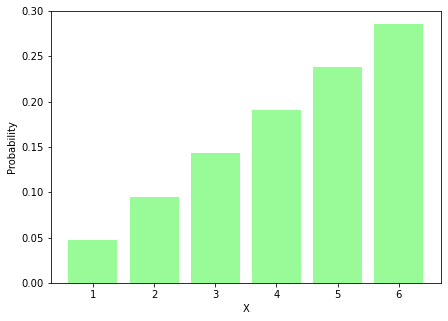

In [3]:
plt.figure(figsize=(7,5))
plt.bar(x_set,prob,color='palegreen')
plt.xlabel('X')
plt.ylabel('Probability')
plt.show()

Text(0.5, 1.0, 'bar garph')

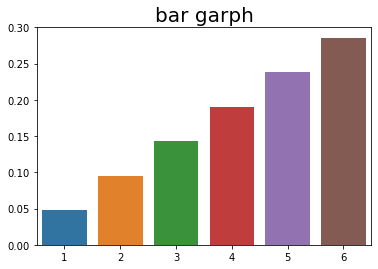

In [4]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.barplot(x_set,prob)
plt.title('bar garph',fontsize=20)

In [5]:
# np.all은 모든 요소가 참일 때만 참을 반환하는 함수
np.all(prob>=0) # 확률이란것은 모두 0보다 크거나 같아야함

True

In [6]:
np.sum(prob) # 그 합계는 항상 1

0.9999999999999999

In [7]:
# 확률함수는 확률변수 X가 x가 될 때의 확률을 반환하는 함수 이지만,
# 확률변수 X가 x이하가 될때의 확률을 반환하는 함수로도 자주 사용된다.
# 이와 같은 함수 f(x)를 누적분포함수 또는 분포함수라 한다. -> 특정확률변수까지의 합계
def F(x):
    return np.sum([f(x_k) for x_k in x_set if x_k <= x])
# prob = np.array([f(x_k) for x_k in x_set]) 처음에 만들어준 확률변수

In [8]:
F(6)  # 확률변수 끝에 있는 6까지 하면 1로 가까워짐

0.9999999999999999

In [9]:
# 확률변수의 변환: 확률변수 X에 2를 곱하고 3을 더한 2X + 3도 확률변수가 된다.
# 확률변수 x를 변환해도 확률변수가 된다
y_set = np.array([2* x_k +3 for x_k in x_set])
prob = np.array([f(x_k) for x_k in x_set])
dict(zip(y_set , prob))

{5: 0.047619047619047616,
 7: 0.09523809523809523,
 9: 0.14285714285714285,
 11: 0.19047619047619047,
 13: 0.23809523809523808,
 15: 0.2857142857142857}

In [10]:
# 1차원 이산형 확률변수의 지표
# 확률 변수의 평균 : 확률변수의 평균은 확률변수의 중심을 나타내는 지표가 되며 기댓값이라고도 부름
np.sum([x_k * f(x_k) for x_k in x_set])

4.333333333333333

In [11]:
# 확률변수의 기댓값은 확률변수를 무제한 시행하여 얻은 실현값의 평균
sample = np.random.choice(x_set, int(1e6), p = prob)
np.mean(sample)

4.331934

In [12]:
# 일반화를 통해서 기댓값의 선형성을 확인
def E(X,g=lambda x :x):
    x_set, f = X 
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])

In [13]:
E(X)

4.333333333333333

In [14]:
E(X , g=lambda x: 2*x+3) # 즉 2x+3으로 변환해서 구한 기댓값과

11.666666666666664

In [15]:
# x의 기대값을 가지고 구한것과 동일
2 * E(X) + 3  # 기댓값의 선형성 확인

11.666666666666666

In [16]:
# 분산
mean = E(X)
np.sum([(x_k - mean)**2 * f(x_k) for x_k in x_set])

2.2222222222222223

In [19]:
# 일반화
def V(X, g = lambda x:x):
    x_set,f = X
    mean = E(X,g)
    return np.sum([(g(i)-mean)** 2 * f(i) for i in x_set])

V(X, lambda x : 2 * x + 3)

8.88888888888889

In [20]:
# 분산의 공식 -> square한것이므로 풀어서는 2의 자승을 해줘야함
2 * 2 * V(X) # 상수는 제외

8.88888888888889

In [29]:
# 2차원 이산형 확률분포 
x_set = np.arange(2,13)  # 두개의 확률변수가 동시에 작동 -> 결합확률분포의 경우
y_set = np.arange(1,7)

In [30]:
def f_XY(x,y):
    if 1 <=y <=6 and 1 <= x-y <=6:
        return y*(x-y) / 441 # 441은 21의 자승
    else:
        return 0

In [31]:
XY=[x_set,y_set, f_XY] # 결합확률함수와 x확률변수 y확률 변수를 x,y에 저장해놓고 그림을 그려줌

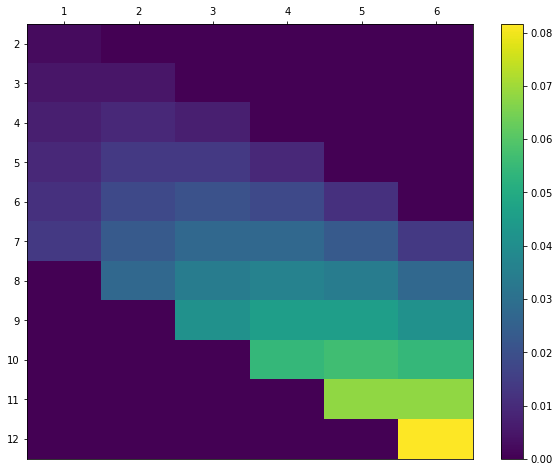

In [32]:
prob = np.array([[f_XY(x_i,y_j) for y_j in y_set] for x_i in x_set])

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

c = ax.pcolor(prob)
x = ax.pcolor(prob)

ax.set_xticks(np.arange(prob.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(prob.shape[0]) + 0.5, minor=False)
ax.set_xticklabels(np.arange(1,7) , minor=False)
ax.set_yticklabels(np.arange(2,13) , minor=False)


# y축을 내림차순으로 역전
ax.invert_yaxis()

# x축 눈금을 그래프 위쪽에 표시
ax.xaxis.tick_top()
fig.colorbar(c,ax=ax) # 두개의 변수의 결합확률이 어떻게 작용하는지 살펴봄
# 밝은색이 확률 높음 -> 12와 6일 때 높음

In [33]:
np.all(prob >=0)  # 역시 확률은 0보다 크거나 같고

True

In [34]:
np.sum(prob)  # 모두의 합은 1

1.0

In [36]:
# 주변확률분포 : 확률변수 (X,Y)는 결합확률분포에 의해 동시에 정의되지만 개별 확률변수에만 관심을 가질 수 있다.
# 확률변수 X만의 움직임 즉 확률변수 X의 확률함수를 알고 싶은 상황에서는 
# 결합확률함수 f xy에서 확률변수 Y의 영향을 제거하면 확률변수 X의 확률함수만 남는다고 생각하면 된다.
def f_X(x):
    return np.sum(f_XY(x, y_k) for y_k in y_set)

In [37]:
def f_Y(y):
    return np.sum([f_XY(x_k, y) for x_k in x_set])

In [38]:
# 주변분포를 구해보면 X와 Y를 각각 독립이라고 생각할 수 있다.
X = [x_set, f_X] # x의 확률변수와 그때의 확률함수
Y = [y_set, f_Y] # y의 확률변수와 그때의 확률함수

In [39]:
X # x의 확률변수와 그때의 각각의 개별 확률함수가 출력

[array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <function __main__.f_X(x)>]

In [40]:
Y # y의 확률변수와 그때의 각각의 개별 확률함수가 출력

[array([1, 2, 3, 4, 5, 6]), <function __main__.f_Y(y)>]

Text(0, 0.5, 'probability')

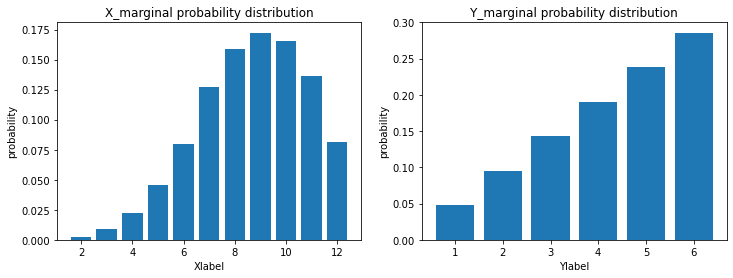

In [41]:
# 그걸 가지고 그림을 그려보면 x확률변수에 대응되는 확률함수에서 구해지는 확률과
# y확률변수에 대응되는 확률함수에서 구해지는 확률과의 대응되는 그림을 볼 수 있음
prob_x = np.array([f_X(x_k) for x_k in x_set])
prob_y = np.array([f_Y(y_k) for y_k in y_set])

fig = plt.figure(figsize =(12,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.bar(x_set,prob_x)
ax2.bar(y_set,prob_y)

ax1.set_title('X_marginal probability distribution')
ax1.set_xlabel('Xlabel')
ax1.set_ylabel('probability')

ax2.set_title('Y_marginal probability distribution')
ax2.set_xlabel('Ylabel')
ax2.set_ylabel('probability')

In [42]:
# 2차원 이산형 확률분포의 지표
# 기댓값 
np.sum([x_i * f_XY(x_i,y_j) for x_i in x_set for y_j in y_set])

8.666666666666666

In [44]:
sum = 0
for y_j in y_set:
    for x_i in x_set:
        sum+=((x_i*f_XY(x_i,y_j)))
sum

8.666666666666666

In [45]:
def E(XY, g):
    x_set,y_set, f_XY = XY
    return np.sum([g(x_i,y_j) * f_XY(x_i,y_j) for x_i in x_set for y_j in y_set])
mean_X = E(XY,lambda x,y:x)
mean_X

8.666666666666666

In [46]:
E(XY,lambda x,y:y) * mean_X

37.55555555555555

In [47]:
np.sum([x_i  * y_j * f_XY(x_i,y_j) for x_i in x_set for y_j in y_set])

39.77777777777778

In [48]:
a,b = 2,3

In [49]:
# 기댓값의 선형성
E(XY , lambda x,y: a*x+ b*y)

30.333333333333332

In [50]:
# 분산 : X의 분산이라면 X관한 편차제곱의 기댓값으로 구할 수 있다.
np.sum([(x_i - mean_X)**2 * f_XY(x_i,y_j) for x_i in x_set for y_j in y_set])

4.444444444444444

In [51]:
def V(XY, g ):
    x_set,y_set, f_XY = XY
    mean = E(XY , g)
    return np.sum([(g(x_i,y_j) - mean)**2 * f_XY(x_i,y_j) for x_i in x_set for y_j in y_set])
V(XY,lambda x,y:y)

2.2222222222222223

In [53]:
# 공분산
def Cov(XY):
    x_set, y_set, f_XY = XY
    mean_Y = E(XY, lambda x,y: y)
    mean_X = E(XY, lambda x,y: x)
    return np.sum([(x_i -mean_X) * (y_j - mean_Y) * f_XY(x_i,y_j) for x_i in x_set for y_j in y_set ])

In [54]:
cov_xy = Cov(XY)

In [55]:
V(XY, lambda x,y:a*x+b*y)

64.44444444444444

In [56]:
var_X = V(XY, lambda x,y:x)
var_Y = V(XY, lambda x,y:y)

In [57]:
# 분산과 공분산의 공식
a**2 * var_X + b**2 * var_Y + 2*a*b *cov_xy

64.44444444444443

In [ ]:
# 확률변수의 상관계수 : 공분산을 각각의 표준편차로 나누어 산출
cov_xy/np.sqrt(var_X * var_Y)

## 대표적인 이산형 확률분포
   - 베르누이 분포
   - 이항분포
   - 기하분포
   - 포아송 분포

In [ ]:
# 그래프를 위한 사용자 함수
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

linestyles = ['-','--',':']

def E(X,g=lambda x:x):
    x_set, f =X
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])

def V(X, g=lambda x:x):
    x_set, f =X
    mean_X = E(X,g)
    return np.sum([(g(x_k)-mean_X)**2 *f(x_k) for x_k in x_set])

def check_prob(X):  # 확률분포를 인수로 가지면 기댓값과 분산 계산 결과를 반환
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])
    assert np.all(prob >= 0), f'minus probability'    # 조건식이 True 가 아니면 문구 출력
    prob_sum = np.round(np.sum(prob),6)
    assert prob_sum == 1, f'sum of probability{prob_sum}'
    print(f'expected value {E(X): .4}')
    print(f'variance {(V(X)):.4}')
    
def plot_prob(X): # 확률분포를 인수로 가지며 그 확률변수의 확률함수와 기댓값을 그리기 위한 함수
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])
    fig = plt.figure(figsize=(6,4))
    ax = fig.add_subplot(111)
    ax.bar(x_set, prob, label ='prob', color='lightsteelblue')
    ax.vlines(E(X), 0, 1, label='mean', color='slateblue')
    ax.set_xticks(np.append(x_set, E(X)))
    ax.set_ylim(0,prob.max()*1.2)
    ax.legend()

### 베르누이 분포
- 가장 기본적인 이산형 확률분포로 확률변수가 취할 수 있는 값이 0과 1밖에 없는 분포이다.
- 베르누이 분포를 따르는 확률변수의 시행을 베르누이 시행이라 하며 1이 나오면 성공, 0이 나오면 실패
- 동전을 던져 앞면이 나올 확률, 주사위를 한번 굴려 6이 나오지 않을 확률

In [ ]:
# 파라미터를 정하면 확률분포가 확정되므로 파라미터 p를 인수로 취하고 x_set와 f를 반환하는 함수로 구현
def Bern(p):
    x_set = np.array([0,1]) # 확률변수가 취할 수 있는 값이 0과 1
    def f(x):
        if x in x_set:
            return p ** x * (1-p) ** (1-x) # 수식
        else:
            return 0
    return x_set, f

In [ ]:
# Bern(0.3)을 따르는 확률변수 x를 작성
p = 0.3 # 성공할 확률이 0.3
X = Bern(p)
X

In [ ]:
# 기댓값과 분산 계산 
# 기댓값 0.3
# 분산 0.3 * 0.7 = 0.21 
check_prob(X)

In [ ]:
# 확률변수 x를 그리면 중앙의 세로선이 확률변수 x의 기댓값을 나타내고 있음
plot_prob(X)

In [ ]:
# scipy stats를 사용하여 구현
# scipy.stats에는 베르누이 분포를 따르는 확률변수를 생성할 수 있는 bernoulli 함수가 존재
# bernoulli 함수는 인수로 파라미터 p를 취하고 Bern(p)를  따르는 fv_frozen object를 반환
rv = stats.bernoulli(p)

In [ ]:
# 확률질량함수(probability mass function)
rv.pmf(0) , rv.pmf(1) # 0과 1을 각각 넘겨주면 그 값을 취하는 확률이 반환

In [ ]:
rv.pmf([0,1]) # 인수로 리스트를 넘길 수 있음 -> 리스트의 각 요소에 대한 확률이 저장된 Numpy의 array가 반환

In [ ]:
# 누적밀도함수(cumulative distribution function)
rv.cdf([0,1]) # 인수로 리스트를 넘겨 줄 수 있음

In [ ]:
# 기댓값, 분산
rv.mean(), rv.var() 

# 이항분포
- 성공확률이 p인 베르누이 시행을 n번 했을 때의 성공 횟수가 따르는 분포
- 성공하는 횟수는 0부터 n번까지이므로, 확률변수가 취할 수 있는 값은 {0,1,..n}
- 성공확률 p는 0 <= p <= 1 시행횟수 n은 1이상인 정수여야 함
f(x) = $_{n}\mathrm{C}_{x}p^x(1-p)^{n-x}$ $(x \in \{0,1,..,n\}$)0                (otherwise)


In [ ]:
# 조합을 계산할 때는 scipy.special에 있는 comb함수 
from scipy.special import comb

def Bin(n,p):
    x_set = np.arange(n+1)
    def f(x):
        if x in x_set:
            
            return comb(n,x) * p **x * (1-p)**(n-x)
        else:
            return 0
    return x_set, f

In [ ]:
# Bin(10,0.3)을 따르는 확률변수 X
n = 10 # 전체 시행 횟수
p = 0.3 # 성공확률
X = Bin(n,p)
X

In [ ]:
check_prob(X)
# 기댓값은 전체 시행 횟수(10) * 성공확률(0.3) = 기댓값(3)
# 분산은 전체 시앻 횟수 (10) * 성공확률(0.3) * 실패확률(0.7) = 분산(2.1) 

In [ ]:
# 이항분포는 기댓값이 정상이 되는 산 모양의 분포를 이룬다
plot_prob(X)

In [ ]:
# scipy.stats에서 이항분포의 확률변수는 binom함수로 생성할 수 있다
# n을 10으로 고정하고 p를 0.3, 0.5, 0.7로 변화시켜 이항분포가 어떠한 형태가 되는지 관찰
# n 인수는 전체 시행 횟수 p는 베르누이 확률분포의 기댓값
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

x_set = np.arange(n+1)
for p ,ls in zip([0.3 ,0.5, 0.7], linestyles):
    rv = stats.binom(n,p)
    ax.plot(x_set, rv.pmf(x_set), label=f'p:{p}', ls=ls, color='k')
    
ax.set_xticks(x_set)
ax.legend()
plt.show()
# p=0.5일 때 좌우대칭 형태로 분포하고 -> (정규분포)
# p = 0.3과 p = 0.7 대칭 관계에 있다는 것을 확인
# p = 0.5일 때는 좌우 대칭으로 중앙에서 높은 확률을 갖게 되며, 
# p=0.3인 경우에는 작은 값 쪽에 확률이 치우쳐 있는 것을 볼 수 있다. 
# 반대로 p=0.9인 경우에는 큰 값에 확률이 치우쳐 있는데, p=0.3보다 더욱 끝 쪽으로 치우쳐 있는 것을 볼 수 있다.

# 기하분포
- 베르누이 시행에서 처음 성공할때까지 시행 횟수가 따르는 분포
- 기하분포의 파라미터는 베르누이 시행의 성공 확률 파라미터 p가 되며 파라미터 p의 기하분포를 Ge(p)로 표기

f(x) = $(1-p)^{x-1}p$ $(x \in \{1,2,3,/,,,\})$
         0                  otherwise
    
- 기하분포의 기댓값과 분산 : E(x) = 1/p , V(x) = (1-p)/p^2

#### 위키
- 베르누이 시행에서 처음 성공까지 시도한 횟수 X의 분포. 지지집합은 {1, 2, 3...}이다.
- 베르누이 시행에서 처음 성공할 때까지 실패한 횟수 Y=X-1의 분포. 지지집합은 {0, 1, 2, ...}이다.
- 성공확률 p인 베르누이 시행에 대해, n번 시행시 첫 번째 성공을 얻을 확률

    * 예시) 어떤 사람이 운전시험에 합격할 확률을 0.5라할 때 적어도 3번안에 시험에서 합격할 확률은?
        * (1-0.5)^(3-1) * 0.5  = 0.125 

In [ ]:
# [과제] 사용자 함수를 구하세요.(단, 확를변수를 1 이상 29 이하인 정수으로 설정)
def Ge(p):
    x_set=np.arange(1,30)
    def f(x):
        if x in x_set:
            return (1-p)**(x-1) * p
        else:
            return 0
    return x_set, f

In [ ]:
# [과제] 성공확률이 0.5일때 기하분포의 기댓값과 분산을 구하세요.
p = 0.5      # p는 베르누이시행의 성공확률파라미터
X = Ge(p)
print("기하분포의 기댓값: ", 1/0.5)    #기하분포의 기댓값은 1/p
print("기하분포의 분산: ", (1-0.5)/0.5**2)   #분산은 (1-p)/p^2

In [ ]:
check_prob(X)
# 기댓값 2
# 분산 2

In [ ]:
# 상기 기하분포의 확률함수와 기댓값을 시각화 하세요.
# check_prob(X)
plot_prob(X)       # 확률변수값이 커질수록 확률은 지수적으로 감소
# 11 이상인 값을 취하는 확률은 거의 0이 되므로 그래프에서 확인이 어렵다

In [ ]:
# scipy.stats에서 기하분포는 geom 함수로 생성할 수 있음
# 파라미터 p가 0.2 0.5 0.8일때의 기하분포 -> 성공확률이 0.2, 0.5, 0.8로 변할 때 확률함수가 변화는 모습을 시각화 
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

x_set = np.arange(1,15)
for p ,ls in zip([0.2 ,0.5, 0.8], linestyles):
    rv = stats.geom(p)
    ax.plot(x_set, rv.pmf(x_set), label=f'p:{p}', ls=ls, color='k')
    
ax.set_xticks(x_set)
ax.legend()
plt.show() 
# 성공확률이 클수록 초반에 '성공'할 확률이 높고, 성공확률이 작을 수록 초반에 '성공' 확률이 낮다
# 파라미터 p가 무엇이든지 간에, 값이 커질수록 확률이 지수적으로 감소하는 분포가 되는 것을 확인

In [ ]:
# 어떤 사람이 운전시험에 합격할 확률을 0.5라할 때 기댓값, 분산, 기하분포 그래프
def Ge_1(p): # 사용자함수 기하분포
    x_set = np.arange(1,31)
    def f(x):
        if x in x_set:
            return p*((1-p)**(x-1)) # 수식
        else:
            return 0
    return x_set, f

p = 0.5 # 합격할 확률
X = Ge_1(p)

plot_prob(X) 
check_prob(X)

In [ ]:
# 빨간공7개 검정공3개가 주머니에 있을때 검정이면 성공 빨강이면 실패
# 이때 1번만에 성공할 확률
0.3*(1-0.3)**(1-1)

In [ ]:
def Ge_1(p):
    x_set= [10]
    def f(x):
        if x in x_set:
            return p*(1-p)**(x-1)
        else:
            return 0
    return x_set, f
p=0.25
X=Ge_1(p)
plot_prob(X)  

#### 포아송 분포
- 임의의 사건이 단위 시간당 발생하는 건수가 따르는 확률분포이며 포아송 분포의 파라미터는 $\lambda$로 나타낸다.
- 하루에 평균 2건의 교통사고가 발생하는 지역에서 하루 교통사고 발생건수는 Poi(2)를 따른다.
- 하루에 한번도 교통사고가 발생하지 않은 확률:  
P(X=0) = 2!/0! * $e^{-2}$ = 0.135
- 포아송 분포의 기댓값과 분산은 모두 $\lambda$가 된다.

f(x) = $\lambda^x/x!*e^{-\lambda}$ $(x \in \{0,1,2,...\})$

In [ ]:
# [과제] 사용자 함수를 구하세요.(단, 확를변수를 1 이상 19 이하인 정수으로 설정)
import math

def Poi(lam):
    x_set=np.arange(20)
    def f(x):
        if x in x_set:
            return (lam**x) / (math.factorial(x)) * 1/(2.71828182846)**(lam)
        else:
            return 0
    return x_set , f

In [ ]:
# 팩토리얼 x!은 scipy.special의 factorial을 사용 
# 취할 수 있는 값은 0 이상인 정수 전부지만 구현의 편의상 19 이하인 정수로 설정
from scipy.special import factorial

def Poi(lam):
    x_set=np.arange(20)
    def f(x):
        if x in x_set:
            return np.power(lam,x) / factorial(x) *np.exp(-lam)
        else:
            return 0
    return x_set , f

In [ ]:
lam = 3
X = Poi(lam)

In [ ]:
# [과제] 𝜆 가 0.3일때 포아송분포의 기댓값과 분산을 구하세요.
X= Poi(3)
# Poi_E = np.sum(x_i * f(x_i) for x_i in x_set)
# print("포아송 분포의 기댓값: ",Poi_E)
# print("포아송 분포의 분산: ",np.sum((x_i - Poi_E)**2 * f(x_i) for x_i in x_set))
check_prob(X)
# 기댓값 분산 모두 3

In [ ]:
# [과제] 상기 포아송분포의 확률함수와 기댓값을 시각화 하세요.
plot_prob(X)
# 포아송 분포도 이항분포와 마찬가지로 기댓값이 정상이 되는 산의 형태

In [ ]:
# scipy.stats에서 포아송 분포는 poisson 함수로 생성 가능
# 파라미터 lambda를 3, 5, 8로 변화시킬 때 포아송 분포의 형태를 그림으로
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

x_set = np.arange(20)
for lam, ls in zip([3,5,8], linestyles):
    rv = stats.poisson(lam)
    ax.plot(x_set, rv.pmf(x_set), label=f'lam:{lam}', ls=ls,color='gray')
    
ax.set_xticks(x_set)
ax.legend()

plt.show()
# 어떠한 파라미터라도 분포의 정상에는 람다가 있고 람다가 커질수록 경사면이 더욱 완만해지는 것을 확인

In [ ]:
# [과제] 베르누이, 이항, 기하, 포아송분포의 사례를 각각 2개씩 제시 및 설명 하세요
# 베르누이
# 빨간공 7개 검정공 3개가 주머니에 있을때 빨강이면 성공 검정이면 실패
# 게임에서 강화성공이 뜰 확률 10% 아닐확률 90%

# 이항분포
# 4지선다형 문제 5개에서 임의로 답을 선택할때 정답을 선택한 문제수
# 게임에서 강화성공이 뜰 확률 10% 아닐확률 90% 에서 10번돌렸을때 성공할 횟수

# 기하분포
# 어느 야구선수가 홈런 칠 확률은 0.05라고 한다. 이 야구선수가 6타석만에 홈런칠 확률은?
# 어떤 사람이 운전시험에 합격할 확률을 0.25라할 때 적어도 3번안에 시험에서 합격할 확률은?

# 포아송 분포
# 고객상담 부서의 1시간 평균 상담건수는 240건일때 1분동안 상담요청 건수가 2건 들어올 경우
# 일일 평균매출이 100만 일때 1시간당 매출이 30일 확률

### 연속형 확률변수
- 이산형 확률변수와 연속형 확률변수의 주된 차이는 확률변수가 취할 수 있는 값이 이산적인가 연속적인가이다.<br><br>
- 확률변수의 경우 계산 과정에 적분이 포함된다. 적분은 SciPy의 integral모듈을 사용하여 구현한다.<br><br>
- 이산형은 값이 딱 떨어지는 것, 연속형은 딱 떨어지지 않음 범위에 대한 면적을 구하는 것

### 연속형 확률분포와 확률밀도함수
- 특정값이 될 확률은 0이란것은 값이 딱 끊어지지 않기 때문이다.<br><br>
- 특정 값이 범위에 들어갈 확률은 확률밀도함수를 적분하여 계산(적분은 곡선 아래 면적의 크기)<br><br>
- x의 변화가 무한소 0으로 가기 때문에 면적은 높이와 같다.<br><br>
- 정규분포는 연속확률분포로 가장 자주 쓰이는 확률분포, 모양은 평균을 중심으로 하나의 봉우리 형태를 띄며 한 집단의 많은 사람들의 키, 몸무게, 시험성적 등의 데이터에 잘 나타나는 분포-> 평균이 가장 정점
    - 표준 정규분포, t분포가 정규분포에 속함
    - 모집단의 분산을 모르는 경우 t분포, 샘플이 자유도로 표현할 수 있는데 수가 30개 미만이면 t분포  그 이상은 표준정규분포 씀 -> 이 분류는 절대적 기준이 아닌 통계적 가이드임<br><br>
- 누적분포함수(cumulative density function) 
    * 연속형 확률분포에 대한 확률 밀도함수를 누적으로 표현한 것
    * 확률분포에서 얻은 확률변수(퍼센트포인트)x가  3일때 누적확률분포가 어떻게 되는지
    * stats.norm.cdf(loc=4,scale=0.8,x=3)<br><br>
- 정규분포의 확률밀도(Probability density function) 
    * 확률변수 3일 때의 확률밀도 N(3|4, 0.8**2) 
    * stats.norm.pdf(loc=4,scale=0.8,x=3)<br><br>
- 하측확률 : '확률변수 x가 N보다 낮을 확률은 M퍼센트이다'에서 N을 고정하고 M을 구하는 경우
    * 이 때의 M이 하측확률이며 M(확률)을 고정하고 N(변수)을 구하는 경우
    * 이때의 N이 퍼센트포인트 하측확률이 2.5%가 되는 퍼센트 포인트<br><br>
    
- 확률밀도함수(probability density function)
    * stats.norm.pdf(x=x)로 하여 loc와 scale을 지정하지 않을 경우 표준정규분포가 됨.<br><br>
- 정규확률분포로 부터 난수 생성
    * stats.norm.rvs(size = 4, random_state = 50) -> 정규확률분포를 따르는 4개 난수생성, random_stata 인자로 초기값 고정
    * 평균 loc 0, 표준편차 scale 1 -> 정규확률 샘플 구하는것

# 요약
- Python에서 scipy.stats 패키지를 이용해 정규확률분포에 대한 함수를 사용할 수 있음.

- 정규확률분포는 norm.함수명을 사용.

- 정규확률밀도함수는 norm.pdf()함수를사용함.

- 정규누적확률밀도함수는 norm.cdf()함수를 사용함.

- 정규확률분포의 분위수는 norm.ppf()함수를 사용함.

- 정규확률분포의 랜덤난수생성은 norm.rvs()함수를 사용함.

- 랜덤난수를 생성할 때, norm.rvs() 함수의 random_state 인자로 초기값을 고정할 수 있음.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy import stats
import scipy as sp
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### linspace( ) 함수는 파이썬의 numpy 모듈에 포함된 함수로서 1차원의 배열 만들기, 그래프 그리기에서 수평축의 간격 만들기 등에 매우 편리하게 사용할 수 있는 함수
-  x=np.linspace(start, stop, num) 
     * start는 배열의 시작값, stop은 배열의 끝값, num은 start와 stop 사이를 몇 개의 일정한 간격으로 요소를 만들 것인지를나타냄

Text(0.5, 1.0, '확률밀도함수')

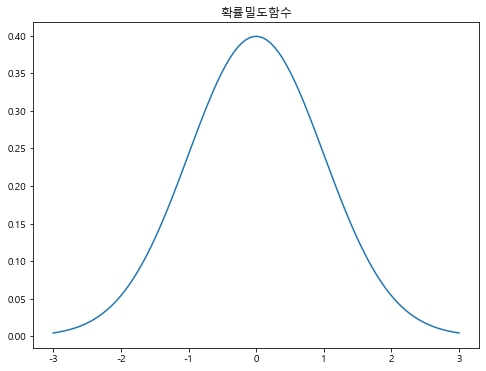

In [60]:
from matplotlib import rc
rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

# 평균 0이고 표준편차 1인 정규분포 객체 만들기
rv = stats.norm(loc = 0, scale = 1) 
xx = np.linspace(-3, 3, 100) # -3에서 3까지 100개 요소 만들기

# 정규확률 밀도함수
pdf = rv.pdf(xx)

plt.figure(figsize=(8,6))
plt.plot(xx,pdf)
plt.title('확률밀도함수')
# 평균 0.4를 정점으로해서 좌우대칭인 종모양 형태

Text(0.5, 1.0, '누적분포함수')

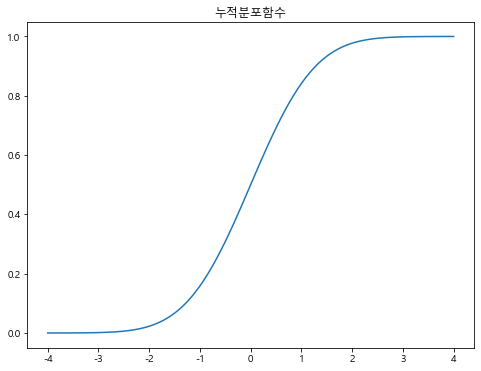

In [61]:
xx = np.linspace(-4,4,100)

# 정규누적확률 밀도함수
cdf = rv.cdf(xx)

plt.figure(figsize=(8,6))
plt.plot(xx,cdf)
plt.title('누적분포함수')
# 그것을 누적으로 만든 누적분포함수 -> 끝 값은 1에 근접

In [62]:
# 불공정한 룰렛을 예로 들어 구현
x_range = np.array([0,1]) # 취할 수 있는 값의 구간에 대해 하한과 상한을 x_range로 정의

def f(x): # x_range를 정의역으로 하는 밀도함수를 구현
    if x_range[0] <= x <=x_range[1]:
        return 2 * x # 2를 곱하는 것은 확률의 성질을 만족하기 위한 것
    else:
        return 0
    
# x_range와 f의 세트가 확률분포 -> 이 확률분포에 의해 확률변수 X의 움직임이 결정됨    
X = [x_range, f] # 따라서 X는 x_range와 f를 요소로 하는 리스트로 구현

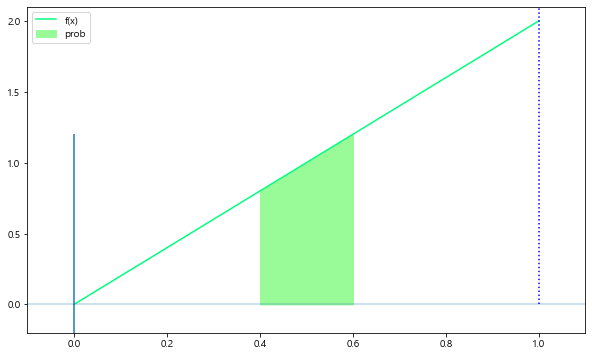

In [65]:
# y = 2x라는 함수식을 그려서 0.4에서 0.6사이의 면적을 구함
# 정의된 확률변수 X가 정의됨 -> 이것으로 밀도함수 f(x)를 그림
xs = np.linspace(x_range[0], x_range[1], 100) # 0.0부터 1.0까지 동일하게 100개 나누기
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

ax.plot(xs, [f(x) for x in xs], label="f(x)", color="springgreen") # x, y, 범례, 색상지정
ax.hlines(0, -0.2, 1.2 ,alpha = 0.3) # 수평선 지정 -> y, xmin, xmax, 음영도
ax.vlines(0, -0.2, 1.2, alpha = 1) # 수직선 지정 -> x, ymin, ymax, 음영도
ax.vlines(xs.max(), 0, 2.2, linestyles=":", color="b") # 수직선 지정 -> x, ymin, ymax, 선 스타일, 색상지정

# 0.4부터 0.6까지의 x좌표를 준비
xs = np.linspace(0.4, 0.6, 100)

# xs의 범위로 f(x)와 x축으로 둘러싸인 영역에 색을 적용
# fill_between  차트의 내부를 채우거나 두 개의 선분을 사이를 특정한 색으로 채워 강조할 수 있다.
ax.fill_between(xs,[f(x) for x in xs], label="prob", color="palegreen") 

# set_xticks : 전체 데이터 범위에 맞춰 눈금을 어디에 배치할지 지정
ax.set_xticks(np.arange(-0.2, 1.3, 0.2))
ax.set_xlim(-0.1, 1.1) # plt.xlim([최솟값, 최댓값])
ax.set_ylim(-0.2, 2.1)
ax.legend() # 둘러싸인 영역의 면적은 사다리꼴 면적 공식 사용도 가능하지만 적분으로 쉽게 구할 수 있음

In [66]:
# 파이썬에서 손쉽게 적분으로 면적을 구해주는것이 integrate.quad
# 첫번째 인수는 피적분 함수와 범위 넣어주면 반한하는값, 두번째인수와 세번째 인수는 적분범위
integrate.quad(f, 0.4, 0.6) # quad 함수는 확률과 추정오차를 반환
# 앞에 값이 확률 추정오차

(0.19999999999999996, 2.2204460492503127e-15)

연속형 확률변수에서는 확률의 성질이 수식을 만족해야함
- f(x)가 항상 0이상의 값을 취함   = 확률은 음수일 수 없다
- f(x)에 대하여 무한대 범위의 적분 결과는 1   = 확률의 합은 1
- 누적분포함수 맨끝에는 1 
- 확률밀도함수 안에 넓이는 1

In [69]:
# minimize_scalar는 함수의 최솟값을 구하는 함수 -> f(x)의 최솟값이 0이상으로 나오면 f(x)가 항상 0 이상의 값을 취함
from scipy.optimize import minimize_scalar

res = minimize_scalar(f)
res.fun # 함수의 최솟값은 fun이라는 인스턴스 변수로 구함

0

In [70]:
# f(x)를 음의 무한대부터 양의 무한대까지 적분한 결과가 1이라는 것은 -> 삼각형의 면적이 1이 되는 것과 같다.
integrate.quad(f,-np.inf,np.inf)[0] # Infinitie (무한)을 의미

1.0

In [71]:
# 정규분포의 확률밀도(Probability density function) 계산 
# 확률변수 3일때 확률밀도 N(3|4.0, 0.8**2)
# stats.norm.pdf(loc=4,scale=0.8,x=3)

x = 3 # 확률변수
mu = 4 # 평균
sigma = 0.8 # 표준편차

1/(np.sqrt(2* np.pi * sigma **2)) * sp.exp(-((x-mu)**2) / (2 * sigma**2))  # 수식에 집어넣어서 사용

0.22831135673627742

In [72]:
# 확률변수가 3일때의 퍼센트포인트 확률
stats.norm.pdf(loc=4, scale=0.8 ,x=3)

0.2283113567362774

In [73]:
# 표준정규분포에서 확률변수가 1일때의 확률밀도(확률)
stats.norm.pdf(loc=0,scale=1,x=1) # 표준정규분포에서 x가 1일때 값

0.24197072451914337

In [74]:
# 정규분포 인스턴스 생성 -> 객체를 만들어서 그 객체로 이용해서 구할수 있음
norm_dist = stats.norm(loc=4,scale=0.8)
norm_dist.pdf(x=3)

0.2283113567362774

In [76]:
x_plot = np.arange(1, 7.1, 0.1)
x_plot

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
       4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1,
       6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7. ])

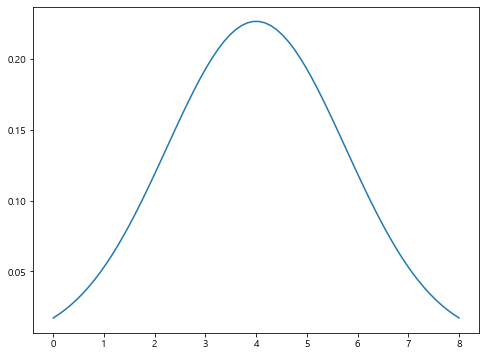

In [77]:
mu = np.mean(x_plot)
std = np.std(x_plot)
rv = stats.norm(loc = mu, scale = std) # loc는 평균, scale은 표준편차

xx = np.linspace(0, 8, 70)    # 0부터 8까지 동일하게 70개로 구분 
pdf = rv.pdf(xx) # 정규분포의 확률밀도

plt.figure(figsize=(8, 6))
plt.plot(xx,pdf)

In [78]:
%%time
# 표본이 어떤값 이하가 되는 비율
np.random.seed(1)
simulated_sample = stats.norm.rvs(loc = 4, scale=0.8 ,size=100000) # 기댓값 4 표준편차 0.8인 랜덤난수 100000개 생성
simulated_sample[:10]

Wall time: 4 ms


array([5.29947629, 3.51059487, 3.5774626 , 3.1416251 , 4.6923261 ,
       2.15876904, 5.39584941, 3.39103448, 4.25523128, 3.8005037 ])

In [79]:
import pandas as pd
df = pd.DataFrame(simulated_sample)
# df.head()
df.describe().round(3)

,0
count,100000.000
mean,4.004
std,0.799
min,0.538
25%,3.466
50%,4.005
75%,4.540
max,7.334


In [80]:
# Q. 3보다 작은 샘플의 합계와 3이하가 되는 확률
a = pd.Series(simulated_sample)
# a
a[a<=3].sum() # 3보다 작은 샘플의 합계

# print(df.loc[df[0]<=3].sum())
# print(len(df.loc[df[0]<=3])/len(simulated_sample))

27151.549504137874

In [81]:
len(simulated_sample)

100000

In [82]:
# 3보다 작은 샘플의 확률 -> 전체 샘플개수에서 3보다 작은 샘플의 개수 나누기
len(a[a<=3])/len(simulated_sample)

0.10371

In [83]:
# 누적분포함수: 확률분포에서 얻은 확률변수 3이하가 되는 확률(loc=4,scale=0.8)
rv = stats.norm(loc=4, scale=0.8)
# rv=stats.norm.cdf(loc=4,scale=0.8, x=3) 평균 4 표준편차 0.8 일때 3이하가 될 확률
rv.cdf(3)

0.10564977366685535

In [3]:
# 정규분포는 평균에 대해 좌우대칭 
# 데이터가 평균값 이하가 될 확률은? 50%
rv = stats.norm.cdf(loc=4, scale=1 ,x=4)
rv

0.5

In [4]:
# 하측확률 : '확률변수 X가 N보다 작을 확률은 M퍼센트이다' 에서 M을 고정하고 N을 구하는 경우
# 하측확률 -> 퍼센트포인트
# 용어를 달리함 -> 하측확률 = 확률밀도 = 확률
# 퍼센트 포인트 = 확률변수
stats.norm.ppf(loc=4, scale=0.8, q=0.025) # 확률밀도함수(probability density function)

2.4320288123679563

In [5]:
# 퍼센트포인트(확률변수) -> 하측확률
# 확률밀도함수의 누적밀도를 구하는 함수인 scipy 패키지의 norm.cdf() 함수
stats.norm.cdf(loc = 4, scale = 0.8, x=2.4320288123679563)

0.024999999999999977

In [6]:
# 하측확률이 50%가 되는 퍼센트포인트는 평균과 일치
# 누적분포함수의 역함수(inverse cumulative distribution function)
stats.norm.ppf(loc=4, scale=0.8, q=0.5)

4.0

In [7]:
#[과제] 평균이 100, 표준편차 10인 정규분포에서 하측확률이 0.3일 경우의 퍼센트포인트를 구하고 그 ppf를 적용하여 하측확률을 구하세요
a = stats.norm.ppf(loc=100,scale=10,q=0.3)
print(a) # 하측확률이 0.3일 경우의 퍼센트포인트 구하기
b = stats.norm.cdf(loc=100,scale=10,x=a) 
print(b) # 하측확률 구하기

94.75599487291959
0.2999999999999998


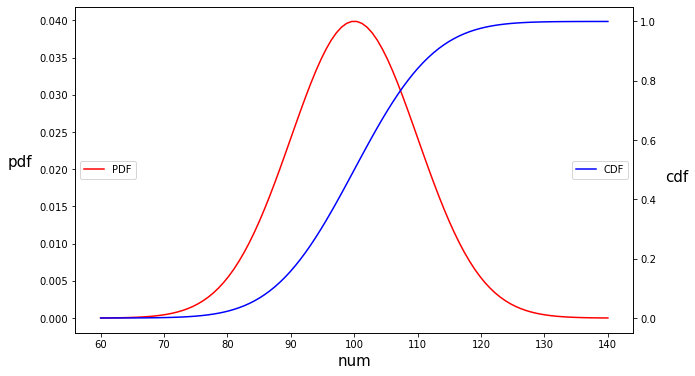

In [14]:
#[과제]상기 정규분포의 확률밀도함수와 누적분포함수를 시각화하여 하측확률과 pp간의 관계를 구하시오
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

rv = stats.norm(loc=100, scale=10)
xx = np.linspace(60,140,100)

pdf = rv.pdf(xx)
cdf = rv.cdf(xx)

line_pdf = ax1.plot(xx, pdf, color='red',label='PDF')
ax1.set_xlabel('num',fontsize=15)
ax1.set_ylabel('pdf',rotation=0,fontsize=15,labelpad=20)

line_cdf = ax2.plot(xx,cdf,color='blue',label='CDF')
ax2.set_ylabel('cdf',rotation=0,fontsize=15,labelpad=20)

ax1.legend(loc='center left') # 범례 추가
ax2.legend(loc='center right')
plt.show()

In [17]:
rv = stats.norm(0,1) 

누적 확률이 직선을 그려드리겠습니다. M을 입력하세요.(0~1사이)0.5


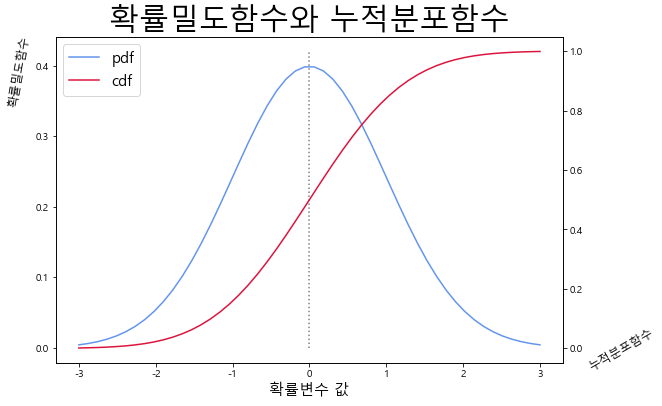

In [25]:
from matplotlib import rc
rc('font', family='Malgun Gothic') # 한글 인코딩
plt.rcParams['axes.unicode_minus'] = False # 음수 부분

a = float(input('누적 확률이 직선을 그려드리겠습니다. M을 입력하세요.(0~1사이)'))
rv = stats.norm(0,1)
xx = np.linspace(-3,3)
pdf = rv.pdf(xx)
cdf = rv.cdf(xx)

fig = plt.figure(figsize=(20,6))
ax1 = fig.add_subplot(121)
ax1.set_ylabel('확률밀도함수', rotation=80, fontsize=12, loc='top')
ax1.set_xlabel('확률변수 값', fontsize=15)
ax1.vlines(rv.ppf(a), 0, 0.42, colors='gray', ls=':') # ls -> linestyle
# 스타일 기타 옵션들 -> markersize -> ms

lns1 = ax1.plot(xx, pdf, label='pdf', color='cornflowerblue')

ax2 = plt.twinx(ax1)
lns2 = ax2.set_ylabel('누적분포함수', rotation=30, fontsize=12,loc='bottom')
lns2 = ax2.plot(xx, cdf, label='cdf', color='crimson')
lns = lns1 + lns2
lab = [i.get_label() for i in lns]
ax1.legend(lns, lab, loc='upper left', fontsize=15)

plt.title('확률밀도함수와 누적분포함수', fontsize=30)
plt.show()

In [28]:
# Q. 0까지 누적분포
rv.cdf(0) # 누적분포함수(cumulative distribution function)

0.5

In [29]:
# Q. 누적분포가 0.5인 x값 
rv.ppf(0.5) # 누적분포함수의 역함수(inverse cumulative distribution function)

0.0

In [30]:
# Q. 0 ~ 1까지의 누적확률분포
rv.cdf(1) - rv.cdf(0)

0.3413447460685429

In [31]:
#  Q. (-2 < x <2) 확률
rv.cdf(2) - rv.cdf(-2)

0.9544997361036416

In [32]:
# Q. 상위 5% 확률의 퍼센트 포인트
rv.isf(0.05) # 생존함수의 역함수(inverse survival function) , sf 생존함수(survival function) = 1 - 누적분포함수

1.6448536269514729

In [33]:
rv.ppf(0.95)

1.6448536269514722

In [34]:
# Q. 하위 5% 확률의 퍼센트 포인트
rv.isf(0.95)
rv.ppf(0.05)

-1.6448536269514729

In [35]:
# Q. 하위 5%, 상위 5%의 퍼센트 포인트
rv.interval(0.9)

(-1.6448536269514729, 1.6448536269514722)

Q. 어느 고등학교 3학년 학생들의 수학 성적은 평균이 70점이고 분산이 64점인 정규분포를 따른다고 한다. 그럼 점수가80점 이상이고 90점 이하일 확률을 구하세요.

In [36]:
std = np.sqrt(64) # 분산이 64이므로 분산에 루트씌우면 표준편차
rv = stats.norm(70,std) # 평균이 70, 표준편차가 8
rv.cdf(90) - rv.cdf(80) # 누적분포함수(cumulative distribution function)

0.09944010834107919

대표적인 연속형 확률분포

In [75]:
import matplotlib.pyplot as plt
from scipy import stats, integrate
from scipy.optimize import minimize_scalar
# from scipy

linestyles=['-','--',':']

def E(X, g=lambda x:x):
    x_range , f =X
    def integrand(x):
        return g(x) * f(x)
    return integrate.quad(integrand, -np.inf,np.inf)[0]

def V(X, g=lambda x:x):
    x_ragne, f =X
    mean = E(X,g)
    def integrand(x):
        return (g(x) - mean) **2 *f(x)
    return integrate.quad(integrand, -np.inf , np.inf)[0]

def check_prob(X):
    x_range , f =X
    f_min = minimize_scalar(f).fun
    assert f_min >= 0 , 'density function is minus value'
    prob_sum = np.round(integrate.quad(f,-np.inf, np.inf)[0],6)
    assert prob_sum ==1 , f'sum of probability is {prob_sum}'
    print(f'expected value {E(X):.3f}')
    print(f'variance {V(X): .3f}')
    
def plot_prob(X,x_min,x_max):
    x_range, f =X
    def F(x):
        return integrate.quad(f,-np.inf,x)[0]
    xs = np.linspace(x_min,x_max,100)
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(111)
    ax.plot(xs,[f(x) for x in xs], label='f(x)', color='rebeccapurple')
    ax.plot(xs, [F(x) for x in xs], label='F(x)', ls='--',color='purple')
    ax.legend()

### 정규분포
- 통계분석에서 자주 사용되는 중요한 확률분포로 자연계에서 일어나는 수많은 현상을 표현. 가우스분포라고도 부름
- 정규분포가 취할 수 있는 값은 실수 전체로 파라미터는 평균과 분산 두가지이다.

In [78]:
# 일반적으로 정규분포를 정의 할때 파라미터에 평균과 분산
# 여기서는 평균과 표준편차를 넣어줌
def N(mu, sigma):
    x_range = [-np.inf, np.inf]
    def f(x): # 정규분포 구하는식
        return  1/ (np.sqrt(2* np.pi*sigma**2)) *  np.exp((-(x-mu)**2) / (2*sigma**2))
                                                          
    return x_range,f

In [79]:
import numpy as np
mu, sigma = 2, 0.5 # 평균이 2고 표준편차가 0.5 일때
X = N(mu,sigma)
check_prob(X)  # 표준편차가 0.5이므로  0.5의 자승은 -> 분산 0.25

expected value 2.000
variance  0.250


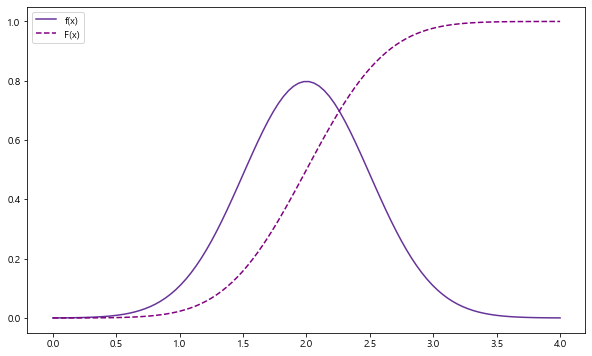

In [81]:
plot_prob(X,0,4)

In [82]:
rv = stats.norm(2, 0.5) # 평균과 표준편차 

In [83]:
# 기댓값과 분산
rv.mean(), rv.var() # 분산은 표준편차의 제곱

(2.0, 0.25)

In [59]:
# 밀도함수
rv.pdf(2)

0.7978845608028654

In [60]:
# 분포함수 : 확률변수 x가 입력값보다 작은값이 되는 확률P
rv.cdf(1.7)

0.27425311775007355

In [61]:
# isf메서드 : 상위 100α%점  -> 상위 100α% 점이란 P(X >= x) = α를 만족하는 x이다
# 퍼센트포인트 확률 구하는것 연습
rv.isf(0.3)   #상위 30%

2.2622002563540207

In [62]:
# 90% 구간을 구하세요
rv.interval(0.9)

(1.1775731865242636, 2.822426813475736)

In [63]:
# 또는  하위 5% , 상위 5%
rv.isf(0.95) , rv.isf(0.05) 

(1.1775731865242638, 2.8224268134757367)

In [64]:
# pp가 2일때 하측확률
rv.cdf(x=2) 

0.5

In [ ]:
# [과제] N(mean, sigma**2) 파라미터를 각각 (0,1), (0,4), (1,1)로 변경할 때의 정규분포를 비교할 수 있도록 시각화 하세

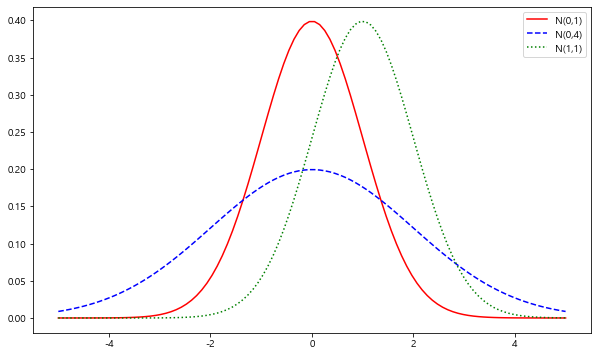

In [101]:
# 정규분포의 파라미터는 평균과 분산  (0,1), (0,4), (1,1)로 변경할 때의 정규분포 형태 확인
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)

xs = np.linspace(-5,5,100)
params = [(0,1),(0,2),(1,1)]
linestyles=['-','--',':']
                                     
for param, ls , color in zip(params,linestyles,colors):
    mu, sigma = param
    rv = stats.norm(mu,sigma)
    plt.plot(xs,rv.pdf(xs), label = f'N({mu},{sigma**2})',ls=ls,color=color)
    
plt.legend()
plt.show()
# 0 .1 은 표준 정규분포 형태 
# 표준편차가 커짐에 따라 분포가 넓어짐 -> 평균은 똑같지만 그래프 높이가 낮아짐
# 평균이 변화화면 분포 전체가 평행 이동하는것을 확인할 수 있다.

#### 지수분포
- 어떤 사건이 발생하는 간격이 따르는 분포이며 확률변수가 취할 수 있는 값은 0이상의 실수
- 지수분포의 파라미터는 $\lambda$로 양의 실수이며 EX($\lambda$)로 표기한다.
-  EX($\lambda$)는 단위시간당 평균 $\lambda$번 발생하는 사건의 발생 간격에 따르는 확률분포이다.

In [102]:
def Ex(lam):
    x_range = [0,np.inf]
    def f(x):
        if x >=0:
            return lam * np.exp(-lam * x)
        else:
            return 0
    return x_range, f

In [103]:
# Ex(3)을 따르는 확률변수 X를 작성
lam = 3
X = Ex(lam)
check_prob(X)

expected value 0.333
variance  0.111


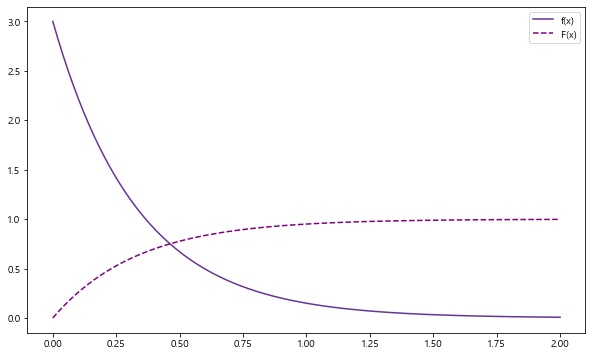

In [104]:
plot_prob(X, 0, 2)
# 특징 급격하게 감소하다가 서서히 감소함

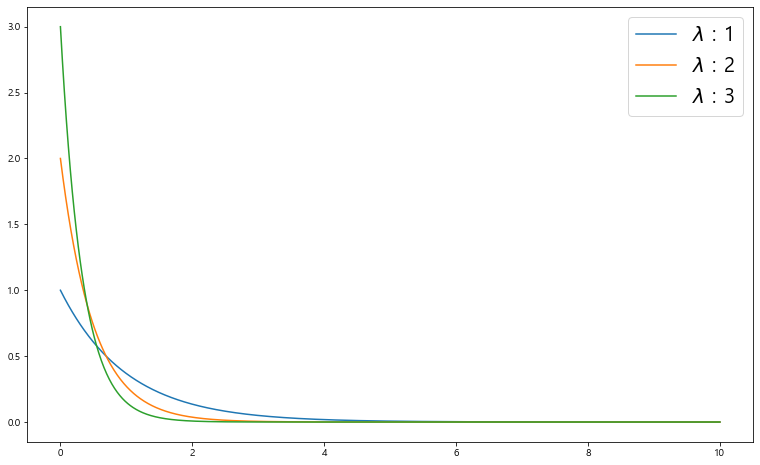

In [105]:
x = np.linspace(0, 10, 1000)

fig = plt.figure(figsize = (13, 8))
ax = fig.add_subplot(111)

for i in range(1, 4):
    lam = i * np.exp(-i * x)
    ax.plot(x, lam)
    ax.legend(['$\lambda$ : 1', '$\lambda$ : 2', '$\lambda$ : 3'], fontsize = 20)
    # 람다가 늘어남에 따라  급격하게 감소

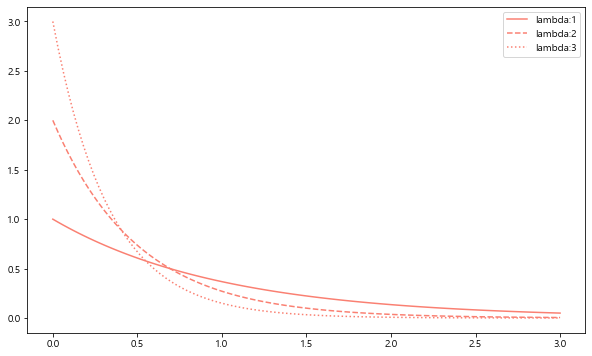

In [106]:
linestyles = ['-','--',':']
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

xs = np.linspace(0,3,100)
for lam,ls in zip([1,2,3], linestyles):
    rv = stats.expon(scale =1/lam)
    ax.plot(xs, rv.pdf(xs), label=f'lambda:{lam}' , ls=ls, color="salmon")
ax.legend()
plt.show()
# 발생하는 사건의 횟수가 늘어날수록 급격하게 감소됨

#### 카이제곱분포 -> 표준정규분포를 가지고 사용
- n개의 표준정규분포가 서로 독립이여야함
- 카이제곱분포는 -> 각각의 정규분포를 자승한것을 모두 더하면 카이제곱분포
- $Z_1, Z_2, ... Z_n$이 서로 독립이고 N(0,1)을 따르고 있을 때 그 제곱합의 확률분포을 자유도가 n인 카이제곱분포라고 한다.
- 카이제곱분포는 분산의 구간 추정이나 독립성 검정에서 사용되는 확률분포이다.-> 독립적으로 만들었으므로
- 좌우비대칭으로 왼쪽으로 치우치고 오른쪽으로 넓어진다.
- 자유도가 커지면 좌우대칭에 가까워진다.
- 자유도의 값 가까이에 분포의 정점이 있다.

In [108]:
# 표본크기 10으로 백만번 무작위 추출하여 카이제곱분포를 따르는 표본 데이터 만들기
n = 10
rv = stats.norm()
sample_size = int(1e6) # 표준정규분포에서 표본 크기 100만으로 무작위 추출
z_sample = rv.rvs((n,sample_size))
z_sample.shape
chi2_sample = np.sum(z_sample**2, axis=0) # axis=0에서 총합을 구하고, 표준정규분포의 제곱합 표본 데이터를 구함

Text(0.5, 1.0, '히스토그램 vs 확률밀도함수')

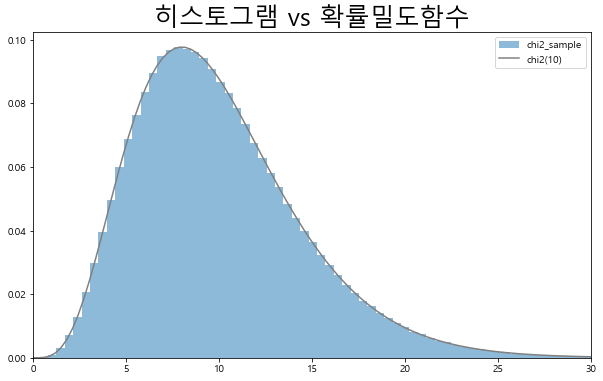

In [109]:
# 표본 데이터의 히스토그램과 밀도함수를 시각화
# 히스토그램과 밀도함수가 정확하게 일치한다
plt.figure(figsize=(10,6))
rv_true = stats.chi2(n)
xs = np.linspace(0,30,100)
plt.hist(chi2_sample, bins=100, density=True, alpha=0.5, label='chi2_sample')
plt.plot(xs, rv_true.pdf(xs), label=f'chi2({n})', color='gray')
plt.xlim(0,30)
plt.legend()
plt.title('히스토그램 vs 확률밀도함수',fontsize = 25)
# 형태는 좌우 비대칭 오른쪽으로 완만함
# 자유도가 커지면 -> 정규분포에 가까워짐
# 자유도가 10인데 정점이 그 주위에 있음

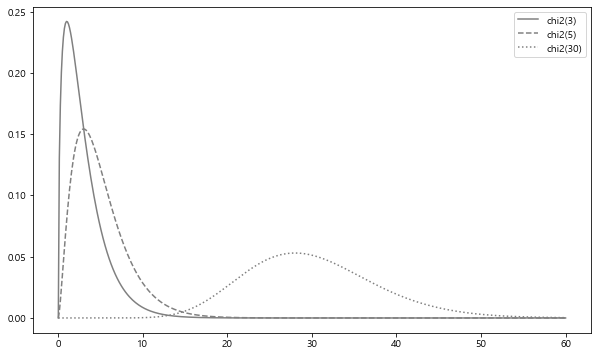

In [113]:
# 자유도 변화에 따른 카이제곱분포 : 자유도를 3, 5, 10으로 변화
# n이 커짐에 따라 정규분포에 가까워짐
plt.figure(figsize=(10,6))
xs = np.linspace(0,60,500)

for n, ls in zip([3,5,30], linestyles):
    rv = stats.chi2(n)
    plt.plot(xs,rv.pdf(xs),
            label=f'chi2({n})', ls=ls, color='gray')
plt.legend() 

In [112]:
# 자유도 n = 5, 상위 5%
rv = stats.chi2(5)
rv.isf(0.05)

11.070497693516355

#### t분포
모집단의 분산을 모르는 경우가 다수일 경우 대비 
정규분포에서 n의 자유도가 작을 경우 어떻게 할것인가
-> 그것을 고민하다가 자유도에따라 유연적으로 대응하는 분포를 만들어준것 t분포<br><br>

- 정규분포에서 모평균의 구간추정 등에 사용되는 확률분포<br><br>

- 확률변수 Z, Y는 서로 독립이고 Z은 표준정규분포 N(0,1)을 Y는 자유도가 n인 카이제곱분포 $\chi^2(n)$을 따를 때 t = ${Z}\over{\sqrt{{Y}\over{n}}}$의 확률분포를 자유도가 n인 t분포라고 한다.<br><br>
-> Z이란 표준정규분포 Y는 카이제곱분포 T통계량을 만들어줌<br><br>
-> N에 따라서 대응이 정규분포를 만들어줌<br><br>
-> Z을 Y로 나누는데, 자유도로 나눈 Y로 나누어줌 그랬을때 자유도가 N인 t분포<br><br>

- t분포의 의미
  * 모분산을 모르는 상황에서도 표본평균의 분포에 대하여 애기할 수 있다.  -> 해결책<br><br>
  * t분포를 만들 때 표본에서 계산한 표준오차로 표본평균을 표준화함 -> 표본오차 사용 가능, 모집단에서 나오는 편차와 차이가 있음 -> 자유도에 따라 정해짐<br><br>
  * 표본에서 계산한 표준오차로 표본평균을 표준화했을 경우의 결과가 t분포를 따른다는 사실을 이용하면 얻어낸 표본평균에 관한 불확실성을 짐작할 수 있다.<br><br>
- t분포의 특성
  * t분포는 모집단이 정규분포이더라도 분산 $\sigma^2$이 알려져 있지 않고 표본의 수가 적은 경우에 평균 $\mu$에 대한 신뢰구간 추정 및 가설검정에 아주 유용하게 쓰이는 분포이다.<br><br>
  * t분포는 표준정규분포처럼 0을 중심으로 종형의 모습을 가진 대칭 분포이다.<br><br>
  * t분포는 꼬리는 표준정규분포 보다 두껍다(fat tail)<br><br>
  * t분포는 자유도 n에 따라 모습이 변하는데 자유도 n이 커짐에 따라 표준정규분포 N(0,1)에 수렴한다. 통상 모집단의 분산이 알려져 있지 않을 경우 표본분포를 결정할 때 표본의 크기가 30 이하이면 t분포를 그 크기가 30 이상이면 표준정규분포를 이용한다. 

In [115]:
n = 10
rv1 = stats.norm()
rv2 = stats.chi2(n) # 자유도가 10인 카이제곱분포 사용

sample_size = int(1e6)
z_sample = rv1.rvs(sample_size)
chi2_sample = rv2.rvs(sample_size)

t_sample = z_sample / np.sqrt(chi2_sample/n)

(-5.0, 5.0)

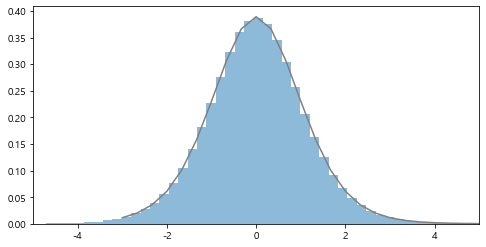

In [116]:
# Q. 표본데이터의 히스토그램과 밀도함수

plt.figure(figsize = (8,4))

rv = stats.t(n)

xs = np.linspace(-3,30,100)
plt.hist(t_sample,bins=100,density = True,alpha=0.5, label='t_sample')
plt.plot(xs,rv.pdf(xs),label = f't({n})',color = 'gray')
plt.xlim(-5,5) # 정규분포처럼 보임

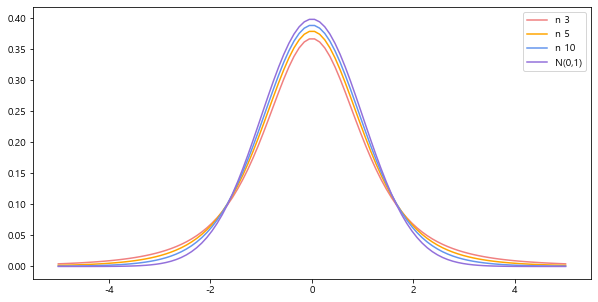

In [117]:
# Q. 자유도 n을 3,5,10으로 변화시킬 경우 분포 형태를 시각화하여 비교하세요.
color = ['lightcoral','orange','cornflowerblue']
freedom = [3,5,10]
plt.figure(figsize=(10,5))
xrange = np.linspace(-5,5,100)
for i,color in zip(freedom, color):
    plt.plot(xrange, stats.t(i).pdf(xrange), color=color,
            label = f'n {i}')
plt.plot(xrange,stats.norm().pdf(xrange), color='mediumpurple', label='N(0,1)')
plt.legend()
plt.show() # 끝에가 두꺼운형태 fat tail
# 좌우대칭인 분포 
# 표준정규분포보다 양쪽 끝이 두껍다
# 자유도가 커지면 표준정규분포에 가까워진다.

In [119]:
# Q. 자유도가 5인 t분포의 상위 5%
rv = stats.t(5) # 자유도 5인 t분포
print(rv.isf(0.05)) # t분포의 상위 5
print(rv.ppf(0.95)) # ppf로는 0.95
1 - rv.cdf(2.015048372669157)

2.0150483726691575
2.015048372669157


0.05000000004235261

#### F분포 -> 서로다른 두개의 카이제곱 분포의 비를 나타냄 
- 가설검정에서 많이씀 유의성 검정할때 f분포 
- 확률변수 $Y_1, Y_2는 서로 독립이고 각각 Y_1$ ~ ${\chi}^2(n_1), Y_2$ ~ ${{\chi}^2(n_2)}$를 따를 때, F = ${Y_1/n_1}\over{Y_2/n_2}$의 확률분포를 자유도 $n_1,n_2$인 F분포 F$(n_1,n_2)$라고 한다.
- 좌우 비대칭으로 왼쪽으로 치우치고 오른쪽으로 넓어지는 분포이다.
- F분포가 취할 수 있는 값은 0 이상인 실수이며 분포의 정점은 1에 가깝다.

In [124]:
n1 = 5
n2 = 10
rv1 = stats.chi2(n1)
rv2 = stats.chi2(n2)

sample_size = int(1e6)
sample1 = rv1.rvs(sample_size)
sample2 = rv2.rvs(sample_size)

f_sample = (sample1/n1) / (sample2/n2)

Text(0.5, 1.0, 'F분포의 샘플 히스토그램 vs 확률밀도함수')

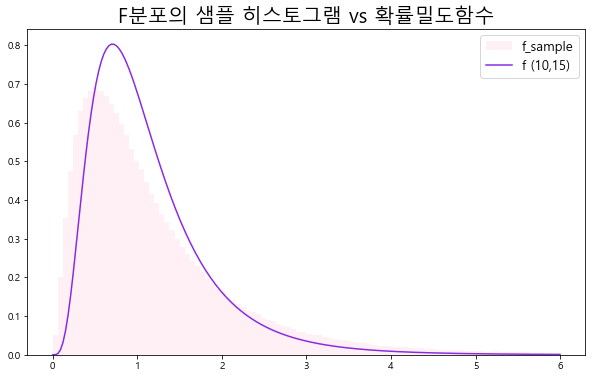

In [123]:
# 표본데이터의 히스토그램과 밀도함수
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

rv = stats.f(n1,n2)
xs = np.linspace(0,6,200)

ax.hist(f_sample,bins=100,range=(0,6), density=True, label = 'f_sample', color='lavenderblush')
ax.plot(xs, rv.pdf(xs) ,label=f'f ({n1},{n2})', color = 'blueviolet')
ax.legend(fontsize=13)
ax.set_title('F분포의 샘플 히스토그램 vs 확률밀도함수',fontsize=20)
# 오른쪽으로 완만한 형태

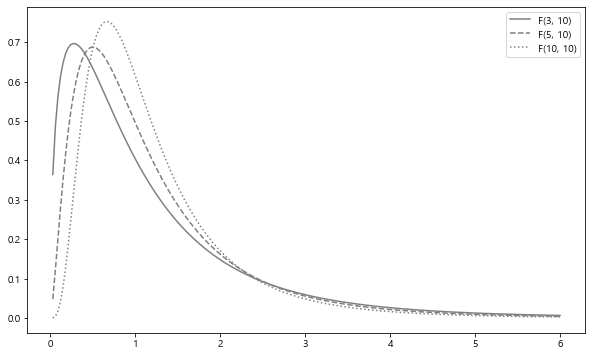

In [122]:
# n2를 10으로 고정하고 n1을 3,5,10으로 변화시킬 때 분포 형태를 시각화하여 비교하세요.
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

xs = np.linspace(0, 6, 200)[1:]
for n1, ls in zip([3,5,10], linestyles):
    rv = stats.f(n1, 10)
    ax.plot(xs, rv.pdf(xs), 
           label=f'F({n1}, 10)', ls=ls, color='gray')
    
ax.legend() # 한쪽 고정 , 자유도가 커질 수록 변환에 따라 오른쪽으로 이동

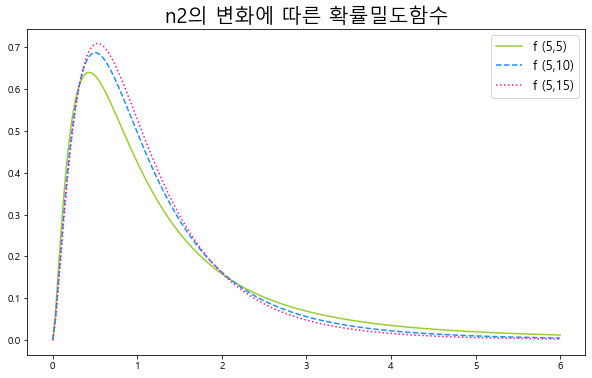

In [121]:
# n1을 5로 고정하고 n2를 5,10,15로 변화시킬 때 분포 형태를 시각화하여 비교하세요.
plt.figure(figsize=(10,6))
color = ['yellowgreen','dodgerblue','deeppink']
xs = np.linspace(0,6,200)
for n2,ls,color in zip([5,10,15],linestyles,color):
    rv = stats.f(5,n2)
    plt.plot(xs,rv.pdf(xs),label=f'f (5,{n2})',ls=ls,color=color)
plt.legend(fontsize=13)
plt.title('n2의 변화에 따른 확률밀도함수',fontsize=20)
plt.show()